In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/SampleSubmission.csv")

In [3]:
train_data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [7]:
train_data['Date'].value_counts()

Date
31-12-21    79
1/1/19      79
2/1/19      79
3/1/19      79
4/1/19      79
            ..
13-01-19    79
12/1/19     79
11/1/19     79
10/1/19     79
9/1/19      79
Name: count, Length: 1096, dtype: int64

In [18]:
train_data['LATLON'] = list(zip(train_data['LAT'], train_data['LON']))
len(train_data['LATLON'].unique())

79

In [6]:
(train_data.ID.value_counts())

ID
PD01     1096
PD04     1096
RO01     1096
RO02     1096
RO03     1096
         ... 
X9897    1096
X9928    1096
X9969    1096
X9993    1096
X9999    1096
Name: count, Length: 79, dtype: int64

In [31]:
for col in train_data:
    missing = train_data[col].isna().sum()
    total = len(train_data[col])
    percent = (missing/total)*100
                  
    print(f"{col}: {missing}/{total} ({np.round(percent, 2)}%)")

ID_Zindi: 0/86584 (0.0%)
Date: 0/86584 (0.0%)
ID: 0/86584 (0.0%)
LAT: 0/86584 (0.0%)
LON: 0/86584 (0.0%)
Precipitation: 0/86584 (0.0%)
LST: 39786/86584 (45.95%)
AAI: 12875/86584 (14.87%)
CloudFraction: 12875/86584 (14.87%)
NO2_strat: 12875/86584 (14.87%)
NO2_total: 12875/86584 (14.87%)
NO2_trop: 35473/86584 (40.97%)
TropopausePressure: 12875/86584 (14.87%)
GT_NO2: 4533/86584 (5.24%)


In [4]:
test_data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure
0,ID_2MYNQS,1/1/19,PD03,45.289376,11.642394,3.277529,NaN,-0.313361,0.771456,0.000024,0.000075,NaN,14440.02819
1,ID_P4U5WU,1/1/19,TV03,45.836941,12.510362,0.000000,NaN,-0.229512,0.398208,0.000023,0.000120,NaN,14434.04790
2,ID_U4KWPK,1/1/19,X5561,45.582894,8.842165,0.000000,282.98,-0.470822,0.153694,0.000023,0.000171,0.000148,14427.42478
3,ID_QGSNTZ,1/1/19,X5953,45.131947,10.015742,1.928031,NaN,0.132952,0.756917,0.000024,0.000266,NaN,14443.09006
4,ID_GHSZ6K,1/1/19,X6701,45.186329,9.146666,0.000000,NaN,-0.198272,0.678858,0.000023,0.000149,NaN,14440.85840


In [26]:
train_data['LST'].isna().sum()

np.int64(39786)

In [27]:
len(train_data['LST'])

86584

In [ ]:
train_data['Date']  = pd.to_datetime(train_data['Date'])

In [49]:
unique_date_count = train_data['Date'].nunique()

print(f"Records per day: {len(train_data)//unique_date_count}" )

Records per day: 79


In [78]:
daywise_no2 = train_data.groupby('Date')['GT_NO2'].agg(['min', 'max', 'mean', 'std'])
daywise_no2 = daywise_no2.reset_index()

In [87]:
daywise_no2['year'] = daywise_no2['Date'].apply(lambda x: x.year)
daywise_no2['month'] = daywise_no2['Date'].apply(lambda x: x.month)
daywise_no2['date'] = daywise_no2['Date'].apply(lambda x: x.day)

In [90]:
daywise_no2.groupby(['date'])['mean'].agg(['median'])

,median
date,
1,43.376274
2,38.097530
3,31.109991
4,19.351389
5,14.372616
6,15.329667
7,14.438905
8,13.506645
9,16.879850


In [84]:
daywise_no2.groupby(['year', 'month'])['mean'].agg(['mean'])

mean
year month           
2019 1      37.368388
     2      35.846305
     3      25.689473
     4      22.080434
     5      21.768718
     6      21.839824
     7      20.496849
     8      19.055595
     9      23.519040
     10     25.161560
     11     29.212760
     12     33.489495
2020 1      40.141134
     2      30.160755
     3      18.491638
     4      15.646635
     5      16.168267
     6      16.486693
     7      17.738943
     8      15.925181
     9      22.299483
     10     27.740565
     11     31.086061
     12     29.583097
2021 1      34.504354
     2      28.183229
     3      21.928092
     4      20.613665
     5      17.310355
     6      16.354099
     7      17.223892
     8      15.955400
     9      20.813426
     10     28.195809
     11     28.349612
     12     36.193625

In [66]:
daywise_no2['month'] = train_data.Date.apply(lambda x: x.month)
daywise_no2['year'] = train_data.Date.apply(lambda x: x.year)

/var/folders/_j/84scrmf1021crzjg0bkcrtvh0000gn/T/ipykernel_3355/1230469487.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


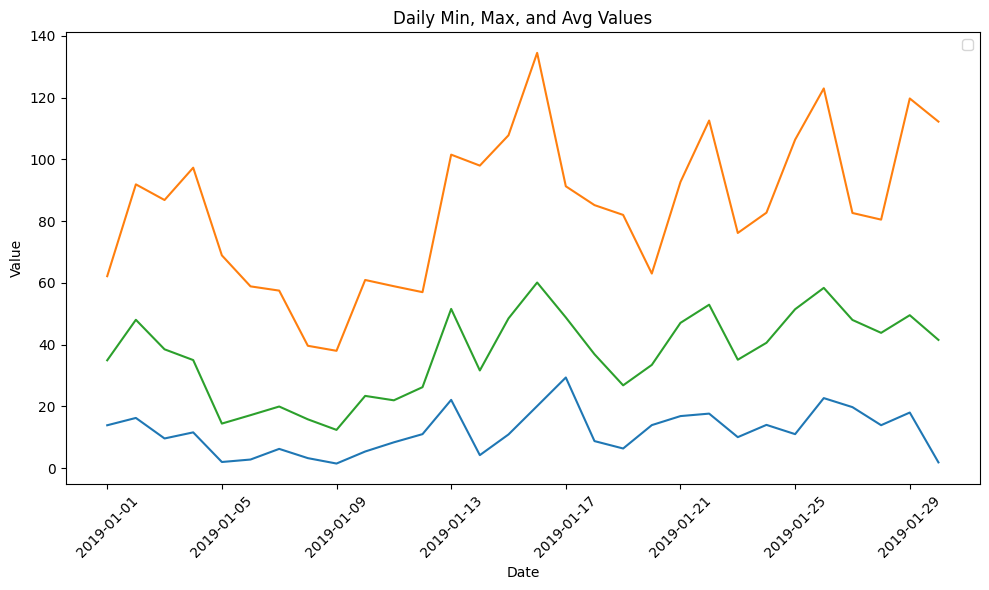

In [60]:
plt.figure(figsize=(10, 6))

plt.plot(daywise_no2.index[:30], daywise_no2['min'][:30])
plt.plot(daywise_no2.index[:30], daywise_no2['max'][:30])
plt.plot(daywise_no2.index[:30], daywise_no2['mean'][:30])

plt.title('Daily Min, Max, and Avg Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/_j/84scrmf1021crzjg0bkcrtvh0000gn/T/ipykernel_3355/1138373921.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


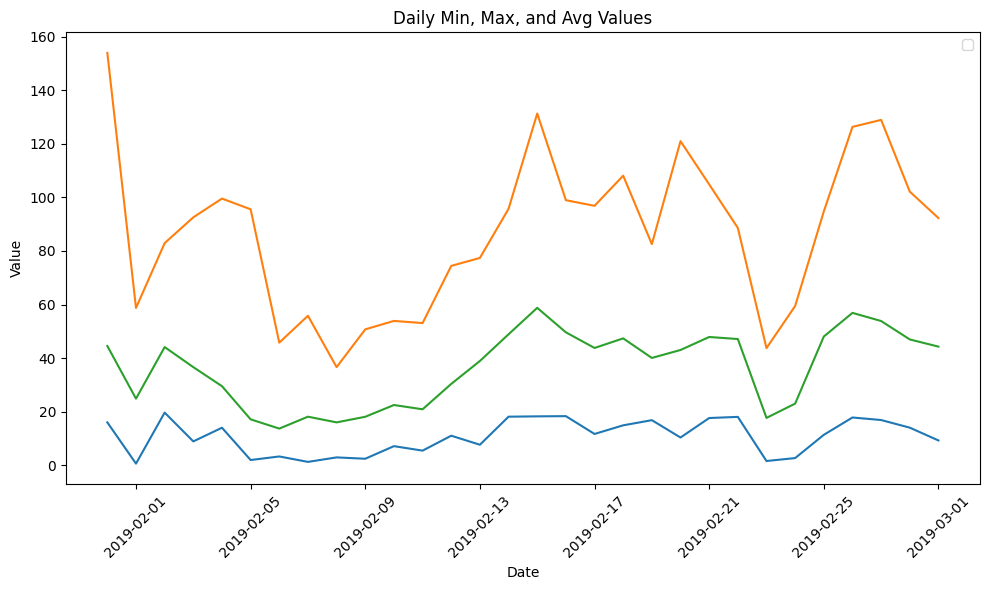

In [61]:
plt.figure(figsize=(10, 6))

plt.plot(daywise_no2.index[30:60], daywise_no2['min'][30:60])
plt.plot(daywise_no2.index[30:60], daywise_no2['max'][30:60])
plt.plot(daywise_no2.index[30:60], daywise_no2['mean'][30:60])

plt.title('Daily Min, Max, and Avg Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [67]:
daywise_no2

,min,max,mean,std,month,year
Date,,,,,,
2019-01-01,13.875,62.175,34.922000,10.127084,NaN,NaN
2019-01-02,16.250,91.925,48.047478,18.339066,NaN,NaN
2019-01-03,9.600,86.850,38.482675,14.204343,NaN,NaN
2019-01-04,11.575,97.325,34.998086,16.032338,NaN,NaN
2019-01-05,1.975,68.925,14.421622,10.173866,NaN,NaN
...,...,...,...,...,...,...
2021-12-27,13.775,77.375,36.854008,12.975114,NaN,NaN
2021-12-28,19.025,67.050,37.318269,10.268785,NaN,NaN
2021-12-29,13.075,62.100,33.401371,10.494924,NaN,NaN


In [93]:
daywise_aai = train_data.groupby('Date')['AAI'].agg(['min', 'max', 'mean', 'std'])
daywise_aai = daywise_aai.reset_index()

daywise_aai['year'] = daywise_aai['Date'].apply(lambda x: x.year)
daywise_aai['month'] = daywise_aai['Date'].apply(lambda x: x.month)
daywise_aai['date'] = daywise_aai['Date'].apply(lambda x: x.day)

/var/folders/_j/84scrmf1021crzjg0bkcrtvh0000gn/T/ipykernel_3355/2134381451.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


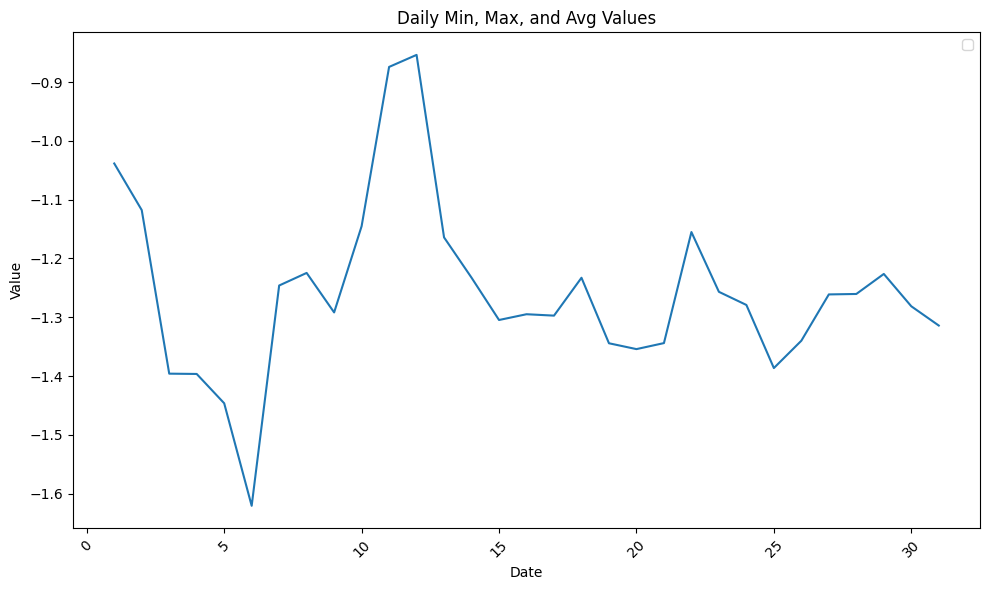

In [101]:
temp = daywise_aai.groupby(['date'])['mean'].agg(['mean'])

plt.figure(figsize=(10, 6))

plt.plot(temp.index, temp['mean'])

plt.title('Daily Min, Max, and Avg Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()